In [ ]:
import pandas as pd
import json
import random
import requests
import numpy as np
from chonkie import RecursiveChunker, LateChunker


In [21]:
import pandas as pd
import json
import random

## 1. CEX Goldstandard dataset Overview

* https://zenodo.org/records/10535653
* There are 112 English papers in 27 categories. 

In [22]:
pdf_df = pd.read_csv("pdf_files_info.csv")
references_data = json.load(open("all_references.json", "r", encoding="utf-8"))

print('CEX Goldstandard dataset:')
print(f"Total documents: {len(pdf_df)}")
print(f"Total categories: {len(pdf_df['category'].unique())}")
print(f"Total pages: {pdf_df['page_count'].sum()}")
# if references key exists: 
print(f"Total references: {sum(len(data['references']) if 'references' in data else 0 for data in references_data.values())}")

CEX Goldstandard dataset:
Total documents: 112
Total categories: 27
Total pages: 1581
Total references: 5160


In [23]:
def get_sample_data(pdf_df, references_data, sample_size=5):
    if not pdf_df.empty:
       print(f'\n=== SAMPLE PDF DATA ===')
       print(pdf_df.sample(sample_size).to_string(index=False))
    
    if references_data:
       print(f'\n=== SAMPLE REFERENCES DATA ===')
       sample_keys = list(references_data.keys())[:sample_size]
       for i, file_id in enumerate(sample_keys):
           ref_data = references_data[file_id]
           print(f"Paper {i+1} (ID: {file_id}):")
           print(f"  Number of references: {len(ref_data['references'])}")
           print(f"  First few references:")
           for j, ref in enumerate(ref_data['references'][:3]):
               print(f"    {j+1}. {ref}")
           if len(ref_data['references']) > 3:
               print(f"    ... and {len(ref_data['references']) - 3} more")
           print()

get_sample_data(pdf_df, references_data)


=== SAMPLE PDF DATA ===
    file_id        filename category                               file_path  page_count                                                                                                                                                                                                                                                                                                                                                                                                                                                    title  publication_year                                   doi                                                                                                                           xml_title                              journal       publisher
 CHE-ENG_17  CHE-ENG_17.pdf  CHE-ENG  benchmarks/cex/all_pdfs/CHE-ENG_17.pdf          10 Jumaidin, R., Sutan Saidi, Z. A., Ahmad Ilyas, R., Ahmad, M. N., Wahid, M. K., Yaakob, M. Y., Maidin, N. A., Ab Rah

<Axes: ylabel='Frequency'>

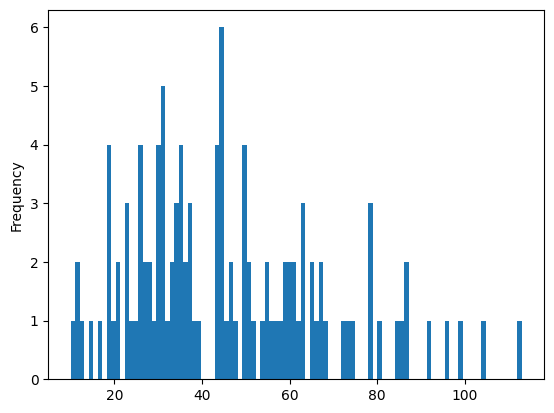

In [24]:
pdf_df['reference_count'] = pdf_df['file_id'].map(lambda x: len(references_data[str(x)]['references']))
pdf_df['reference_count'].plot(kind='hist', bins=100)

<Axes: ylabel='Frequency'>

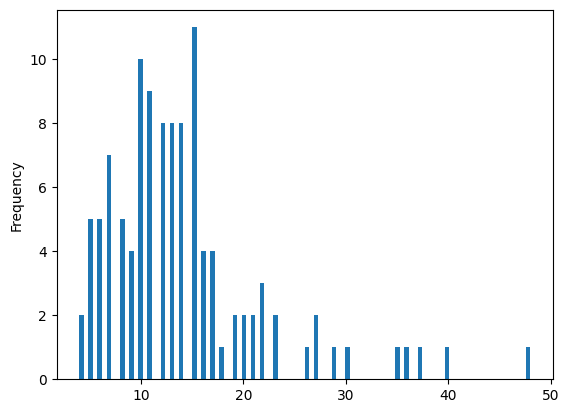

In [25]:
pdf_df['page_count'].plot(kind='hist', bins=100)

# Checking Sliver data for Original ref string


In [26]:
gt_file = 'all_references.json'
sliver_file = 'all_references_sliver.json'
gt_data = json.load(open(gt_file, 'r', encoding='utf-8'))
random.sample(list(gt_data.keys()), 5)

['VET_105', 'COM-SCI_25', 'NEU_83', 'NUR_85', 'MAT-SCI_66']

In [27]:
import random


def check_random_ref_string(n=5, n_ref=5):
    gt_file = 'all_references.json'
    sliver_file = 'all_references_sliver.json'
    gt_data = json.load(open(gt_file, 'r', encoding='utf-8'))
    sliver_data = json.load(open(sliver_file, 'r', encoding='utf-8'))

    # select n random file names from the gold standard
    random_files_names = random.sample(list(gt_data.keys()), n)
    for file_name in random_files_names:
        # file_id = int(file_name)
        gt_references = gt_data[file_name]['references']
        sliver_references = sliver_data[file_name]['references']
        
        # Check if the sliver references are a subset of the gold standard references
        if len(sliver_references) == len(gt_references):
            print(f"File {file_name} has the same number of references in both gold standard and sliver.")
        else:
            print(f"File {file_name} has a different number of references in gold standard and sliver.")
        
        print(f"checking random reference string to see if match")
        ref_id = random.sample(list(range(len(gt_references))), n_ref)
        for i in ref_id:
            print("--------------------------------")
            print(f"gold standard reference: {gt_references[i]}")
            print(f"sliver reference: {sliver_references[i]}")
            # print("--------------------------------")
        print("================================================")


check_random_ref_string()

        

File PHA-TOX-PHA_92 has the same number of references in both gold standard and sliver.
checking random reference string to see if match
--------------------------------
gold standard reference: W Sun, B Zhang, X Yu, C Zhuang, X Li, J Sun, Y Xing, Z Xiu, Y Dong. Oroxin A from Oroxylum indicum prevents the progression from prediabetes to diabetes in streptozotocin and high-fat diet induced mice. Phytomedicine. 2018. Vol. 38
sliver reference: Sun, W.; Zhang, B.; Yu, X.; Zhuang, C.; Li, X.; Sun, J.; Xing, Y.; Xiu, Z.; Dong, Y. Oroxin A from Oroxylum indicum prevents the progression from prediabetes to diabetes in streptozotocin and high-Fat diet induced mice. *Phytomedicine* **2018**, *38*, 24–34. [CrossRef](http://dx.doi.org/10.1016/j.phymed.2017.10.003)
--------------------------------
gold standard reference: J H Yang, S S Cho, K M Kim, J Y Kim, Eun Joo Kim, E Y Park, J H Lee, S H Ki. Neoagarooligosaccharides enhance the level and efficiency of LDL receptor and improve cholesterol home